# Stock price prediction and forecasting using stacked LSTM

In [1]:
import pandas as pd
import numpy, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

In [6]:
df1.shape

(1258,)

In [7]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

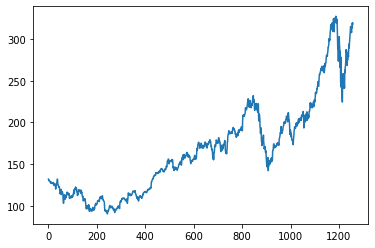

In [8]:
plt.plot(df1);

In [9]:
# Scaling of data

mmc = MinMaxScaler(feature_range=(0,1))
df1 = mmc.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(1258, 1)

In [11]:
# train test split 

train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size

In [12]:
train_size,  test_size

(817, 441)

In [13]:
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1), :1]

In [14]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [15]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [16]:
# create an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)    

In [17]:
# Reshape into X=t, t+1,t+2, t+3 and Y=t+4

time_step=100

X_train,y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [19]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [20]:
X_test.shape, y_test.shape

((340, 100), (340,))

In [21]:
# reshape data as requirement of LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [22]:
#!pip install tensorflow

## Create stacked LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
          
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 25s 569ms/step - loss: 0.0175 - val_loss: 0.0673
Epoch 2/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 3/100
12/12 [==============================] - 3s 280ms/step - loss: 8.4592e-04 - val_loss: 0.0062
Epoch 4/100
12/12 [==============================] - 4s 295ms/step - loss: 7.6671e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 3s 262ms/step - loss: 6.5040e-04 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 3s 286ms/step - loss: 5.9613e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 3s 279ms/step - loss: 6.0564e-04 - val_loss: 0.0044
Epoch 8/100
12/12 [==============================] - 4s 310ms/step - loss: 5.9135e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 5s 385ms/step - loss: 5.9970e-04 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 3s 290ms

12/12 [==============================] - 3s 291ms/step - loss: 2.0295e-04 - val_loss: 0.0012
Epoch 79/100
12/12 [==============================] - 3s 254ms/step - loss: 1.9354e-04 - val_loss: 0.0012
Epoch 80/100
12/12 [==============================] - 3s 256ms/step - loss: 1.8826e-04 - val_loss: 0.0011
Epoch 81/100
12/12 [==============================] - 4s 332ms/step - loss: 1.8324e-04 - val_loss: 0.0014
Epoch 82/100
12/12 [==============================] - 4s 296ms/step - loss: 1.9381e-04 - val_loss: 0.0025
Epoch 83/100
12/12 [==============================] - 3s 275ms/step - loss: 3.0994e-04 - val_loss: 0.0017
Epoch 84/100
12/12 [==============================] - 3s 265ms/step - loss: 2.3941e-04 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 4s 276ms/step - loss: 2.2101e-04 - val_loss: 9.9461e-04
Epoch 86/100
12/12 [==============================] - 3s 290ms/step - loss: 1.8656e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 4

In [30]:
#do prediction and check metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
# Traansform back to origional form

train_predict = mmc.inverse_transform(train_predict)
test_predict = mmc.inverse_transform(test_predict)

In [32]:
# Calsulate RMSE performance metrics

math.sqrt(mean_squared_error(y_train, train_predict))

143.11194346985164

In [33]:
# RMSE of Test data

math.sqrt(mean_squared_error(y_test, test_predict))

243.62514551958424

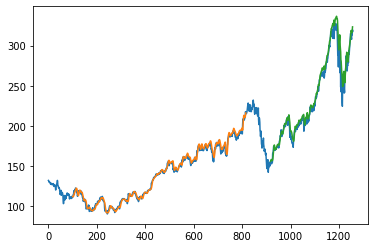

In [34]:
### Plot
# shifting train predictions for plotting

look_back = 100
trainpredict_plot = numpy.empty_like(df1)
trainpredict_plot[:,:] = np.nan
trainpredict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# shifting train predictions for plotting

testpredict_plot = numpy.empty_like(df1)
testpredict_plot[:,:] = np.nan
testpredict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

# plot baseline and predictions

plt.plot(mmc.inverse_transform(df1))
plt.plot(trainpredict_plot)
plt.plot(testpredict_plot)
plt.show()

In [35]:
len(test_data)

441

In [36]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [38]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [52]:
# demonsstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100 
i=0
while (i<30):
    if (len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        y_pred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_pred.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_pred.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.99831468 1.01272666 1.03051877 1.04872561
 1.06640255 1.08334851 1.09957492 1.11517668 1.13029456 1.14508891
 1.15971589 1.17430973 1.18897378 1.20377362 1.21874332 1.23388863
 1.2491926  1.26462674 1.2801528  1.29573202 1.31132

7 day output [[1.5848929]]
8 day input [0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.99831468 1.01272666 1.03051877 1.04872561 1.06640255 1.08334851
 1.09957492 1.11517668 1.13029456 1.14508891 1.15971589 1.17430973
 1.18897378 1.20377362 1.21874332 1.23388863 1.2491926  1.26462674
 1.2801528  1.29573202 1.31132698 1.32690537 1.34243774 1.35790217
 1.37327957 1.38855469 

15 day output [[1.6750712]]
16 day input [0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.99831468 1.01272666
 1.03051877 1.04872561 1.06640255 1.08334851 1.09957492 1.11517668
 1.13029456 1.14508891 1.15971589 1.17430973 1.18897378 1.20377362
 1.21874332 1.23388863 1.2491926  1.26462674 1.2801528  1.29573202
 1.31132698 1.32690537 1.34243774 1.35790217 1.37327957 1.38855469
 1.4037149  1.4187479  1.43364239 1.44838715 1.4629705  1.47738016
 1.49160337 1.50562692

25 day output [[1.7607896]]
26 day input [0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.99831468 1.01272666 1.03051877 1.04872561 1.06640255 1.08334851
 1.09957492 1.11517668 1.13029456 1.14508891 1.15971589 1.17430973
 1.18897378 1.20377362 1.21874332 1.23388863 1.2491926  1.26462674
 1.2801528  1.29573202 1.31132698 1.32690537 1.34243774 1.35790217
 1.37327957 1.38855469 1.4037149  1.4187479  1.43364239 1.44838715
 1.4629705  1.47738016 1.49160337 1.50562692 1.51943827 1.53302431
 1.54637396 1.5594753  1.5723182  1.58489287 1.5971911  1.60920632
 1.62093174 1.6323617

In [42]:
day_new = np.arange(1, 101)
day_pred = np.arange(101,131)

In [44]:
len(df1)

1258

In [45]:
df2 = df1.tolist()
df2.extend(lst_output)

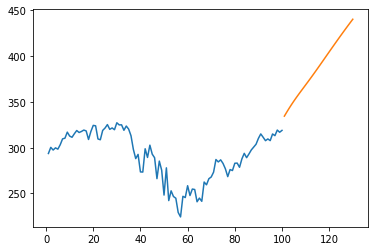

In [46]:
plt.plot(day_new, mmc.inverse_transform(df1[1158:]))
plt.plot(day_pred, mmc.inverse_transform(lst_output))
plt.show()

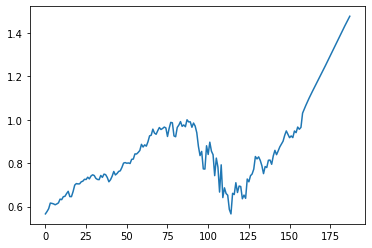

In [51]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1100:])
plt.show()